KeyboardInterrupt: 

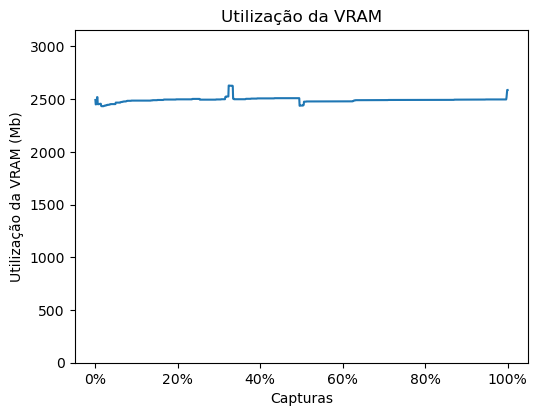

In [1]:
import pandas as pd
import os
from customtkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from glob import glob
import customtkinter as ctk

#back-end

# Defina a figura como uma variável global
figura = None

# Mapeamento de colunas para seus respectivos indicadores
indicadores = {
    'FPS': '',
    'GPU UTIL': '(%)',
    'GPU TEMP': '(°C)',
    'GPU MEM UTIL': '(Mb)',
    'CPU UTIL': '(%)',
    'SYSTEM MEM UTIL': '(Gb)'
}
# Ler o arquivo CSV e armazenar os dados em um DataFrame
def pegarArquivo():
    caminhoBase = os.path.expanduser('~')  # Expandir para o diretório do usuário atual
    pastaParcial = r'\AppData\Local\AMD\CN'  # Transformar a parte padrão do diretório em variável
    pastaCompleta = caminhoBase + pastaParcial  # Criar o diretório a partir da junção do caminho base e da parte padrão
    arquivos = glob(os.path.join(pastaCompleta, '*.csv'))  # Criar uma lista de arquivos com a extensão csv
    arquivoMaisRecente = max(arquivos, key=os.path.getctime) if arquivos else "base.csv"
    return arquivoMaisRecente

def criaGrafico():
    global figura

    coluna = coluna_mapeamento[parametro.get()]  # Mapeie a opção do combobox para o nome da coluna
    # Criar uma lista de valores percentuais a cada 20%
    percentuais = [f"{i}{'%'}" for i in range(0, 101, 20)]

    # Definir o número de ticks desejados no eixo x
    num_ticks = len(percentuais)

    # Limpar o gráfico existente
    grafico.clear()

    # Definir os locais dos ticks manualmente para corresponder aos rótulos de 20%
    tick_locations = [i * (len(tabela) // (num_ticks - 1)) for i in range(num_ticks)]

    # Definir os rótulos personalizados no eixo x
    plt.xticks(tick_locations, percentuais)

    # Plotar o gráfico com os dados da coluna escolhida
    grafico.set_ylim(0, tabela[coluna].max() * 1.20)
    grafico.set_ylabel(f"{parametro.get()} {indicadores[coluna]}")
    grafico.set_xlabel('Capturas')
    grafico.set_title(parametro.get())
    grafico.plot(tabela[coluna])

    # Atualizar o canvas
    canva.draw()

def salvarGrafico():
    global figura
    # Solicitar ao usuário o local e o nome do arquivo para salvar
    file_path = filedialog.asksaveasfilename(defaultextension='.png', filetypes=[('PNG Files', '*.png')])

    if file_path:
        figura.savefig(file_path)  # Salvar o gráfico com o nome e local escolhidos pelo usuário




# Front-end

janela = ctk.CTk()

tabela = pd.read_csv(pegarArquivo())

# Opções personalizadas na combobox
opcoes_combobox = ('FPS', 'Utilização da GPU', 'Temperatura da GPU', 'Utilização da VRAM', 'Utilização da CPU', 'Utilização da Memória RAM')

# Mapeamento de opções do combobox para nomes das colunas
coluna_mapeamento = {
    'FPS': 'FPS',
    'Utilização da GPU': 'GPU UTIL',
    'Temperatura da GPU': 'GPU TEMP',
    'Utilização da VRAM': 'GPU MEM UTIL',
    'Utilização da CPU': 'CPU UTIL',
    'Utilização da Memória RAM': 'SYSTEM MEM UTIL'
}

largura = janela.winfo_screenwidth()
altura = janela.winfo_screenheight()

# Calcula o tamanho da janela considerando a decoração
largura_janela = int(largura * 0.33)
altura_janela = int(altura * 0.7)

janela = ctk.CTk()
janela.geometry(f"{largura_janela}x{altura_janela}")

ctk.set_appearance_mode("dark")

janela.minsize(largura * 0.33, altura * 0.5)

fonte_personalizadaT = ("Roboto", int(0.022 * altura), 'bold')
fonte_personalizada = ("Roboto", int(0.020 * altura))
fonte_personalizadaD = ("Arial", int(0.020 * altura), "black")
fonte_personalizadaI = ("Arial", int(0.080 * altura))

F1 = ctk.CTkFrame(janela, fg_color="#DD0031", width=largura, height=altura*0.03)
F1.pack(padx=largura*0.01, pady=altura*0.01)
F1.pack_propagate(False)

titulo = ctk.CTkLabel(F1, text="API AMD Adrenalin - Analisador de Performance", font=fonte_personalizadaT, anchor="center", text_color="White")
titulo.pack(pady=1, expand=True)

F2 = ctk.CTkFrame(janela, fg_color="#DD0031", width=largura, height=altura*0.2)
F2.pack(padx=largura*0.01, pady=altura*0.01)
F2.pack_propagate(False)

parametro_Lbl = ctk.CTkLabel(F2, text="Escolha o parâmetro que deseja analisar abaixo: ", font=fonte_personalizada, anchor="center", text_color="White")
parametro_Lbl.pack(pady=1, expand=True)

parametro = ctk.CTkComboBox(F2, font=fonte_personalizada, text_color="White", values=opcoes_combobox, width=largura, justify="center")
parametro.pack(padx=5, pady=2, expand=True)

analisar_Btn = ctk.CTkButton(F2, font=fonte_personalizada, text="Analisar", width=largura, bg_color="#DD0031", fg_color="#343638", command=criaGrafico, text_color="White", hover_color="#565B5E")
analisar_Btn.pack(padx=5, pady=2, expand=True)

salvar_Btn = ctk.CTkButton(F2, font=fonte_personalizada, text="Salvar Gráfico", width=largura, bg_color="#DD0031", fg_color="#343638", command=salvarGrafico, text_color="White", hover_color="#565B5E")
salvar_Btn.pack(padx=5, pady=2, expand=True)

F3 = ctk.CTkFrame(janela, fg_color="#DD0031", width=largura, height=altura*0.6)
F3.pack(padx=largura*0.01, pady=altura*0.01)
F3.pack_propagate(False)

figura = plt.figure(figsize=(8, 4), dpi=100)
grafico = figura.add_subplot(111)

canva = FigureCanvasTkAgg(figura, F3)
canva.get_tk_widget().pack(padx=5, pady=5, expand=True, fill="both")

janela.mainloop()
